In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic regression analysis library
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.iolib.summary2 import summary_col

##
from sklearn.linear_model import LogisticRegression

# Configure the visualization style
sns.set(style="whitegrid")

In [2]:
df_all = pd.read_csv("ess_preprocessed_copy.csv")

In [3]:
selected_columns = [
    'gndr', 'basinc','agea', 'eduyrs', 'emplrel', 'uemp3m', 'hincsrca',
    'hinctnta', 'lrscale', 'polintr', 'gincdif', 'smdfslv', 'sbeqsoc',
    'sbprvpv', 'gvslvue', 'bennent', 'sbstrec', 'sblazy', 'dfincac'
]

# Filter the dataframe for Germany and select the desired columns
df_de = df_all[df_all['cntry'] == 'DE'][selected_columns]

In [4]:
df_de.describe()

,gndr,basinc,agea,eduyrs,emplrel,uemp3m,hincsrca,hinctnta,lrscale,polintr,gincdif,smdfslv,sbeqsoc,sbprvpv,gvslvue,bennent,sbstrec,sblazy,dfincac
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000
mean,0.528752,0.476157,48.559257,14.255961,1.388850,0.287167,2.142356,5.807504,2.064165,0.680575,0.801543,0.765428,0.663394,0.819425,0.677069,0.717391,0.488780,0.592567,0.627279
std,0.499260,0.499519,18.488016,3.312506,1.127098,0.452519,1.652587,2.799842,2.291862,0.466336,0.398908,0.423805,0.472632,0.384733,0.467679,0.450347,0.499962,0.491443,0.483614
min,0.000000,0.000000,15.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.000000,12.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,50.000000,14.000000,1.000000,0.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,63.000000,16.000000,1.000000,1.000000,4.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,94.000000,28.000000,6.000000,1.000000,8.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Create logistic regression model using demographic variables with continuous age and education years
demographic_model_formula = "basinc ~ agea + gndr + eduyrs"
demographic_model = smf.logit(demographic_model_formula, data=df_de).fit()

# Assign a name to the model
demographic_model.title = "Demographic Model"

# View summary of the logistic regression model
print(demographic_model.summary())


Optimization terminated successfully.
         Current function value: 0.690895
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2848
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 May 2023   Pseudo R-squ.:                0.001611
Time:                        23:43:27   Log-Likelihood:                -1970.4
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                   0.09539
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2271      0.202      1.123      0.261      -0.169       0.623
agea          -0.0050      0.

In [10]:
df_de["emplrel"].value_counts()

1    2363
2     295
6     142
3      52
Name: emplrel, dtype: int64

In [11]:
# Define a function to replace 6 with an even distribution of 1, 2, and 3
def replace_six(value):
    if value == 6:
        return np.random.choice([1, 2, 3], p=[1/3, 1/3, 1/3])
    else:
        return value

# Replace the value 6 in the emplrel column with an even distribution of 1, 2, and 3
df_de['emplrel'] = df_de['emplrel'].apply(replace_six)

In [12]:
# Create dummy variables for emplrel and hincsrca
emplrel_dummies = pd.get_dummies(df_de['emplrel'], prefix='emplrel')
hincsrca_dummies = pd.get_dummies(df_de['hincsrca'], prefix='hincsrca')

# Drop the first dummy variable for each categorical variable to avoid multicollinearity
emplrel_dummies = emplrel_dummies.iloc[:, 1:]  # drop the first column
hincsrca_dummies = hincsrca_dummies.iloc[:, 1:]  # drop the first column

# Add the dummy variables to the DataFrame
df_de = pd.concat([df_de, emplrel_dummies, hincsrca_dummies], axis=1)

# Create logistic regression model using the specified independent variables
independent_vars = ' + '.join(emplrel_dummies.columns) + ' + ' + ' + '.join(hincsrca_dummies.columns) + ' + hinctnta'
model_formula = f"basinc ~ {independent_vars}"
model = smf.logit(model_formula, data=df_de).fit()

model.title = "Economic Model"


# View summary of the logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.679454
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2841
Method:                           MLE   Df Model:                           10
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 0.01814
Time:                        23:44:00   Log-Likelihood:                -1937.8
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 2.157e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3398      0.107      3.172      0.002       0.130       0.550
emplrel_2      0.3819      0.

In [13]:
# Create dummy variables for lrscale
lrscale_dummies = pd.get_dummies(df_de['lrscale'], prefix='lrscale')

# Drop the dummy variable for the center value (5) to use it as the reference category
lrscale_dummies = lrscale_dummies.drop(columns=['lrscale_5'])

# Add the dummy variables to the DataFrame
df_de = pd.concat([df_de, lrscale_dummies], axis=1)

# Create logistic regression model using polintr and the lrscale dummy variables
independent_vars = 'polintr + ' + ' + '.join(lrscale_dummies.columns)
pol_model_formula = f"basinc ~ {independent_vars}"
pol_model = smf.logit(pol_model_formula, data=df_de).fit()

pol_model.title = "Political Model"

# View summary of the logistic regression model
print(pol_model.summary())

Optimization terminated successfully.
         Current function value: 0.682448
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2848
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 0.01382
Time:                        23:45:26   Log-Likelihood:                -1946.3
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 8.594e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0167      0.080     -0.209      0.835      -0.174       0.140
polintr       -0.2550      0.

In [14]:
# List of binary variables to include in the model
binary_vars = ['gincdif', 'smdfslv', 'sbeqsoc', 'sbprvpv', 'gvslvue', 'bennent', 'sbstrec', 'sblazy', 'dfincac']

# Create logistic regression model using the specified binary variables
independent_vars = ' + '.join(binary_vars)
soc_model_formula = f"basinc ~ {independent_vars}"
soc_model = smf.logit(soc_model_formula, data=df_de).fit()

soc_model.title = 'Social Model'


# View summary of the logistic regression model
print(soc_model.summary())

Optimization terminated successfully.
         Current function value: 0.655652
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2842
Method:                           MLE   Df Model:                            9
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 0.05254
Time:                        23:45:30   Log-Likelihood:                -1869.9
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 9.365e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4582      0.178     -2.567      0.010      -0.808      -0.108
gincdif        0.4893      0.

In [15]:
# Variables for demographics
demographic_vars = "agea + gndr + eduyrs"

# Variables for economic predictors
emplrel_vars = ' + '.join(df_de.columns[df_de.columns.str.startswith('emplrel_')])
hincsrca_vars = ' + '.join(df_de.columns[df_de.columns.str.startswith('hincsrca_')])
economic_vars = f"{emplrel_vars} + {hincsrca_vars} + hinctnta + uemp3m"

# Variables for political predictors
political_vars = "polintr + lrscale_0 + lrscale_1"

# Variables for values and opinions
values_opinions_vars = "gincdif + smdfslv + sbeqsoc + sbprvpv + gvslvue + bennent + sbstrec + sblazy + dfincac"

# Create logistic regression model using all the variables
independent_vars = f"{demographic_vars} + {economic_vars} + {political_vars} + {values_opinions_vars}"
all_model_formula = f"basinc ~ {independent_vars}"
all_model = smf.logit(all_model_formula, data=df_de).fit()

all_model.title = 'All Model'

# View summary of the logistic regression model
print(all_model.summary())


Optimization terminated successfully.
         Current function value: 0.640708
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2825
Method:                           MLE   Df Model:                           26
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 0.07413
Time:                        23:45:36   Log-Likelihood:                -1827.3
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 6.271e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0564      0.301     -0.187      0.851      -0.647       0.534
agea          -0.0043      0.

In [20]:
#Analysis of the rich individuals with interaction terms

In [5]:
df_de['is_rich'] = (df_de['hinctnta'] > 6).astype(int)

In [6]:
# List of demographic variables
demographic_vars_list = ['agea', 'gndr', 'eduyrs']

# Create interaction terms for demographic variables with 'is_rich'
for var in demographic_vars_list:
    interaction_term_name = f"{var}_rich"
    df_de[interaction_term_name] = df_de[var] * df_de['is_rich']

# Check the first few rows of the dataset to see if the interaction terms were created
df_de.head()


,gndr,basinc,agea,eduyrs,emplrel,uemp3m,hincsrca,hinctnta,lrscale,polintr,...,sbprvpv,gvslvue,bennent,sbstrec,sblazy,dfincac,is_rich,agea_rich,gndr_rich,eduyrs_rich
7570,1,1,22,12,1,0,1,6.0,0,0,...,0,0,1,0,0,0,0,0,0,0
7571,1,1,58,10,1,0,1,2.0,5,1,...,1,1,0,1,1,1,0,0,0,0
7572,1,0,64,12,1,0,1,4.0,5,1,...,1,1,1,1,1,1,0,0,0,0
7573,1,0,52,10,1,0,1,9.0,1,0,...,1,1,1,1,0,1,1,52,1,10
7574,1,0,67,19,1,0,1,10.0,1,1,...,1,1,1,0,1,1,1,67,1,19


In [21]:
# Create a string with demographic interaction terms
interaction_demographic_vars = " + ".join([f"{var}_rich" for var in demographic_vars_list])

# Create a logistic regression model using the demographic variables and their interaction terms with 'is_rich'
demographic_interaction_formula = f"basinc ~ {demographic_vars} + {interaction_demographic_vars}"
model_demographic_interaction = smf.logit(demographic_interaction_formula, data=df_de).fit()

model_demographic_interaction.title = "Rich Demographic"

# View summary of the logistic regression model
print(model_demographic_interaction.summary())


Optimization terminated successfully.
         Current function value: 0.685918
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2845
Method:                           MLE   Df Model:                            6
Date:                Thu, 04 May 2023   Pseudo R-squ.:                0.008802
Time:                        23:54:43   Log-Likelihood:                -1956.2
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 4.829e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0497      0.206      0.241      0.809      -0.354       0.453
agea           -0.0044    

In [23]:
df_de.columns

Index(['gndr', 'basinc', 'agea', 'eduyrs', 'emplrel', 'uemp3m', 'hincsrca',
       'hinctnta', 'lrscale', 'polintr', 'gincdif', 'smdfslv', 'sbeqsoc',
       'sbprvpv', 'gvslvue', 'bennent', 'sbstrec', 'sblazy', 'dfincac',
       'is_rich', 'agea_rich', 'gndr_rich', 'eduyrs_rich', 'emplrel_2',
       'emplrel_3', 'hincsrca_2', 'hincsrca_3', 'hincsrca_4', 'hincsrca_5',
       'hincsrca_6', 'hincsrca_7', 'hincsrca_8', 'lrscale_0', 'lrscale_1'],
      dtype='object')

In [24]:
# Create interaction terms for economic variables
economic_vars_list = df_de.columns[df_de.columns.str.startswith('emplrel_')].tolist() + df_de.columns[df_de.columns.str.startswith('hincsrca_')].tolist() + ['uemp3m']
for var in economic_vars_list:
    df_de[f"{var}_rich"] = df_de[var] * df_de["is_rich"]

# Economic variables without hinctnta
economic_vars_no_hinctnta = ' + '.join(df_de.columns[df_de.columns.str.startswith('emplrel_')].tolist() + df_de.columns[df_de.columns.str.startswith('hincsrca_')].tolist() + ['uemp3m'])

# Interaction terms for economic variables without hinctnta
economic_interaction_vars_no_hinctnta = ' + '.join(df_de.columns[df_de.columns.str.endswith('_rich') & ~df_de.columns.str.startswith('hinctnta')])


In [25]:
# Create logistic regression model with interaction terms for economic variables (excluding hinctnta)
economic_vars_interaction = f"{emplrel_vars} + {hincsrca_vars} + uemp3m + {emplrel_vars}:is_rich + {hincsrca_vars}:is_rich + uemp3m:is_rich"

model_formula = f"basinc ~ {economic_vars_interaction}"
economic_interaction_model = smf.logit(model_formula, data=df_de).fit()

economic_interaction_model.title = "Rich Economic"

# View summary of the logistic regression model
print(economic_interaction_model.summary())


Optimization terminated successfully.
         Current function value: 0.680931
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2838
Method:                           MLE   Df Model:                           13
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 0.01601
Time:                        23:59:41   Log-Likelihood:                -1942.0
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 1.401e-08
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2650      0.055     -4.818      0.000      -0.373      -0.157
emplr

In [26]:
# Create logistic regression model with interaction terms for economic variables (excluding hinctnta)
economic_vars_interaction = f"{emplrel_vars} + {hincsrca_vars} + uemp3m + emplrel_2:is_rich + emplrel_3:is_rich + hincsrca_2:is_rich + hincsrca_3:is_rich + hincsrca_4:is_rich + hincsrca_5:is_rich  + hincsrca_7:is_rich + hincsrca_8:is_rich + uemp3m:is_rich"

model_formula = f"basinc ~ {economic_vars_interaction}"
economic_interaction_model = smf.logit(model_formula, data=df_de).fit(maxiter=10000)

economic_interaction_model.title = "Rich Economic 6"

# View summary of the logistic regression model
print(economic_interaction_model.summary())

Optimization terminated successfully.
         Current function value: 0.679688
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2832
Method:                           MLE   Df Model:                           19
Date:                Fri, 05 May 2023   Pseudo R-squ.:                 0.01781
Time:                        00:00:19   Log-Likelihood:                -1938.5
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 8.255e-08
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2642      0.055     -4.798      0.000      -0.372      -0.156
emplr

In [27]:
# List of political variables
political_vars_list = ['polintr', 'lrscale_0', 'lrscale_1']

# Creating interaction terms with 'is_rich'
for var in political_vars_list:
    df_de[f'{var}_rich'] = df_de[var] * df_de['is_rich']

# Adding interaction terms to the political_vars string
interaction_terms = ' + '.join([f'{var}_rich' for var in political_vars_list])
political_vars_with_interaction = f"{political_vars} + {interaction_terms}"


In [28]:
# Run logistic regression model with political variables and interaction terms
model_formula = f"basinc ~ {political_vars_with_interaction}"
political_model_interaction = smf.logit(model_formula, data=df_de).fit(maxiter=100)

political_model_interaction.title = "Rich Political"

# View the summary of the logistic regression model
print(political_model_interaction.summary())


Optimization terminated successfully.
         Current function value: 0.678477
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2845
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 May 2023   Pseudo R-squ.:                 0.01956
Time:                        00:00:35   Log-Likelihood:                -1935.0
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 1.357e-14
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0306      0.080     -0.381      0.703      -0.188       0.127
polintr          

In [29]:
# Create interaction terms for values and opinions variables
values_opinions_vars_list = [
    'gincdif', 'smdfslv', 'sbeqsoc', 'sbprvpv',
    'gvslvue', 'bennent', 'sbstrec', 'sblazy', 'dfincac'
]

interaction_terms = [f"{var}:is_rich" for var in values_opinions_vars_list]
interaction_formula = ' + '.join(interaction_terms)

# Create logistic regression model using values and opinions variables and their interactions with is_rich
independent_vars = f"{values_opinions_vars} + {interaction_formula}"
model_formula = f"basinc ~ {independent_vars}"
values_opinions_model = smf.logit(model_formula, data=df_de).fit(maxiter=1000)

values_opinions_model.title = "Rich Opinions"

# View summary of the logistic regression model
print(values_opinions_model.summary())


Optimization terminated successfully.
         Current function value: 0.650570
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2833
Method:                           MLE   Df Model:                           18
Date:                Fri, 05 May 2023   Pseudo R-squ.:                 0.05988
Time:                        00:00:49   Log-Likelihood:                -1855.4
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 4.760e-40
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.4272      0.181     -2.355      0.019      -0.783      -0.072
gincdif       

In [37]:
df_de.columns

Index(['gndr', 'basinc', 'agea', 'eduyrs', 'emplrel', 'uemp3m', 'hincsrca',
       'hinctnta', 'lrscale', 'polintr', 'gincdif', 'smdfslv', 'sbeqsoc',
       'sbprvpv', 'gvslvue', 'bennent', 'sbstrec', 'sblazy', 'dfincac',
       'is_rich', 'agea_rich', 'gndr_rich', 'eduyrs_rich', 'emplrel_2',
       'emplrel_3', 'hincsrca_2', 'hincsrca_3', 'hincsrca_4', 'hincsrca_5',
       'hincsrca_6', 'hincsrca_7', 'hincsrca_8', 'lrscale_0', 'lrscale_1',
       'emplrel_2_rich', 'emplrel_3_rich', 'hincsrca_2_rich',
       'hincsrca_3_rich', 'hincsrca_4_rich', 'hincsrca_5_rich',
       'hincsrca_6_rich', 'hincsrca_7_rich', 'hincsrca_8_rich', 'uemp3m_rich',
       'polintr_rich', 'lrscale_0_rich', 'lrscale_1_rich', 'gincdif_rich',
       'smdfslv_rich', 'sbeqsoc_rich', 'sbprvpv_rich', 'gvslvue_rich',
       'bennent_rich', 'sbstrec_rich', 'sblazy_rich', 'dfincac_rich'],
      dtype='object')

In [38]:
# Variables for demographics
demographic_vars = "agea + gndr + eduyrs"
demographic_interaction_terms = "agea_rich + gndr_rich + eduyrs_rich"

# Variables for economic predictors
economic_vars = "emplrel_2 + emplrel_3 + hincsrca_2 + hincsrca_3 + hincsrca_4 + hincsrca_5 + hincsrca_7 + hincsrca_8 + uemp3m"
economic_interaction_terms = "emplrel_2_rich + emplrel_3_rich + hincsrca_2_rich + hincsrca_3_rich + hincsrca_4_rich + hincsrca_5_rich + hincsrca_7_rich + hincsrca_8_rich + uemp3m_rich"

# Variables for political predictors
political_vars = "polintr + lrscale_0 + lrscale_1"
political_interaction_terms = "polintr_rich + lrscale_0_rich + lrscale_1_rich"

# Variables for values and opinions
values_opinions_vars = "gincdif + smdfslv + sbeqsoc + sbprvpv + gvslvue + bennent + sbstrec + sblazy + dfincac"
values_opinions_interaction_terms = "gincdif_rich + smdfslv_rich + sbeqsoc_rich + sbprvpv_rich + gvslvue_rich + bennent_rich + sbstrec_rich + sblazy_rich + dfincac_rich"

# Create logistic regression model using all the variables
all_vars = f"{demographic_vars} + {economic_vars} + {political_vars} + {values_opinions_vars}"
all_interaction_terms = f"{demographic_interaction_terms} + {economic_interaction_terms} + {political_interaction_terms} + {values_opinions_interaction_terms}"
model_formula = f"basinc ~ {all_vars} + {all_interaction_terms}"
all_model = smf.logit(model_formula, data=df_de).fit()



all_model.title = "Rich All"


# View summary of the logistic regression model
print(all_model.summary())


Optimization terminated successfully.
         Current function value: 0.638249
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 basinc   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2803
Method:                           MLE   Df Model:                           48
Date:                Fri, 05 May 2023   Pseudo R-squ.:                 0.07769
Time:                        00:20:35   Log-Likelihood:                -1820.3
converged:                       True   LL-Null:                       -1973.6
Covariance Type:            nonrobust   LLR p-value:                 2.178e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2812      0.298     -0.943      0.346      -0.866       0.303
agea          

In [41]:
models = {
    'Model 1': model_demographic_interaction,
    'Model 2': economic_interaction_model,
    'Model 3': political_model_interaction,
    'Model 4': values_opinions_model,
    'Model 5': all_model,
}


# Create a table with the results from all models
results_table = summary_col(
    list(models.values()),
    stars=True,
    model_names=list(models.keys()),
    float_format="%.3f",
    info_dict={
        'N': lambda x: "{0:d}".format(int(x.nobs)),
        'Model': lambda x: x.title,
    }
)

# Print the table
print(results_table)





                       Model 1          Model 2        Model 3        Model 4     Model 5 
------------------------------------------------------------------------------------------
Intercept          0.050            -0.264***       -0.031         -0.427**      -0.281   
                   (0.206)          (0.055)         (0.080)        (0.181)       (0.298)  
agea               -0.004*                                                       -0.002   
                   (0.002)                                                       (0.004)  
agea_rich          -0.004                                                        -0.006   
                   (0.004)                                                       (0.006)  
bennent                                                            -0.422***     -0.435***
                                                                   (0.122)       (0.126)  
bennent:is_rich                                                    0.375**               

In [42]:
with open("summary_table_rich.txt", "w") as file:
    file.write(results_table.as_text())


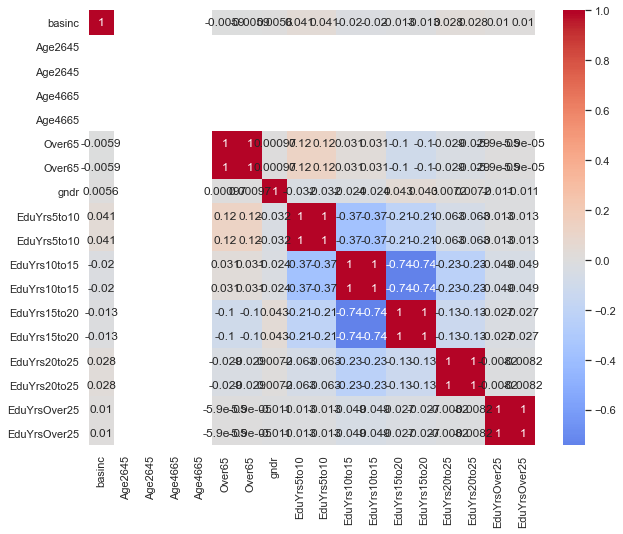

In [9]:
# Select columns to include in the correlation matrix
columns_to_include = ['basinc', 'Age2645', 'Age4665', 'Over65', 'gndr', 'EduYrs5to10', 'EduYrs10to15', 'EduYrs15to20', 'EduYrs20to25', 'EduYrsOver25']

# Calculate correlation matrix
correlation_matrix = df_de[columns_to_include].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()
